# 데이터 전처리

In [16]:
import pandas as pd

## 전처리한 데이터를 다시 불러오기

In [17]:
df = pd.read_csv("./data/전처리한_인구데이터.csv")  # utf8 인코딩의 plain text 파일이므로, encoding 옵션을 지정할 필요가 없습니다.
print(df.shape)
df.head()

(13, 21)


,Unnamed: 0,강원도,강원특별자치도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,...,세종특별자치시,울산광역시,인천광역시,전국,전라남도,전라북도,전북특별자치도,제주특별자치도,충청남도,충청북도
0,2012년_총인구수,1538630.0,NaN,12093299,3319314,2698353,1469216,2505644,1524583,3538484,...,113117,1147256,2843981,50948272,1909618,1873341.0,NaN,583713,2028777,1565628
1,2013년_총인구수,1542263.0,NaN,12234630,3333820,2699440,1472910,2501588,1532811,3527635,...,122153,1156480,2879782,51141463,1907172,1872965.0,NaN,593806,2047631,1572732
2,2014년_총인구수,1544442.0,NaN,12357830,3350257,2700794,1475884,2493264,1531809,3519401,...,156125,1166377,2902608,51327916,1905780,1871560.0,NaN,607346,2062273,1578933
3,2015년_총인구수,1549507.0,NaN,12522606,3364702,2702826,1472199,2487829,1518775,3513777,...,210884,1173534,2925815,51529338,1908996,1869711.0,NaN,624395,2077649,1583952
4,2016년_총인구수,1550806.0,NaN,12716780,3373871,2700398,1469214,2484557,1514370,3498529,...,243048,1172304,2943069,51696216,1903914,1864791.0,NaN,641597,2096727,1591625


DataFrame의 인덱스로 지정되었던 행정구역 컬럼은 `Unnamed: 0`로 지정되어있습니다.

`./data/전처리한_인구데이터.csv` 데이터를 텍스트 편집기로 열어보면, 인덱스였기에 행정구역 컬럼명은 누락된 상태이기 때문입니다.

```
,강원도,강원특별자치도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,서울특별시,세종특별자치시,울산광역시,인천광역시,전국,전라남도,전라북도,전북특별자치도,제주특별자치도,충청남도,충청북도
```

In [18]:
# 아래와 같이 첫번째 컬럼명만 바꿔보려 했지만, 아래와 같이 .columns 속성은 immutable하다고 합니다.
# TypeError: Index does not support mutable operations
# df.columns[0] = "행정구역"
# df.columns

아래와 같이 모든 컬럼명을 지정해서 변경해도 되지만, 모든 컬럼명을 일일이 지정해야한다는 것은 번거롭고, 실수할 여지도 있습니다.

In [19]:
# df.columns = [
#     "연도별 총인구수",
#     '강원도', '강원특별자치도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시',
#     '대전광역시', '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전국', '전라남도',
#     '전라북도', '전북특별자치도', '제주특별자치도', '충청남도', '충청북도'
# ]
# df.columns

In [20]:
# 아래와 같이 코드를 통해 컬럼명을 list로 변환합니다.
# list는 mutable 하므로 변경할 수 있습니다.
column_names = list(df.columns)
column_names[0] = "연도별 총인구수"
column_names

['연도별 총인구수',
 '강원도',
 '강원특별자치도',
 '경기도',
 '경상남도',
 '경상북도',
 '광주광역시',
 '대구광역시',
 '대전광역시',
 '부산광역시',
 '서울특별시',
 '세종특별자치시',
 '울산광역시',
 '인천광역시',
 '전국',
 '전라남도',
 '전라북도',
 '전북특별자치도',
 '제주특별자치도',
 '충청남도',
 '충청북도']

In [21]:
# 변경된 컬럼명을 적용합니다.
df.columns = column_names
df.columns

Index(['연도별 총인구수', '강원도', '강원특별자치도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시',
       '대전광역시', '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전국', '전라남도',
       '전라북도', '전북특별자치도', '제주특별자치도', '충청남도', '충청북도'],
      dtype='object')

> 데이터 전처리가 완료되었습니다.

# 시각화로 인구 데이터 확인하기

In [22]:
import plotly.graph_objects as go

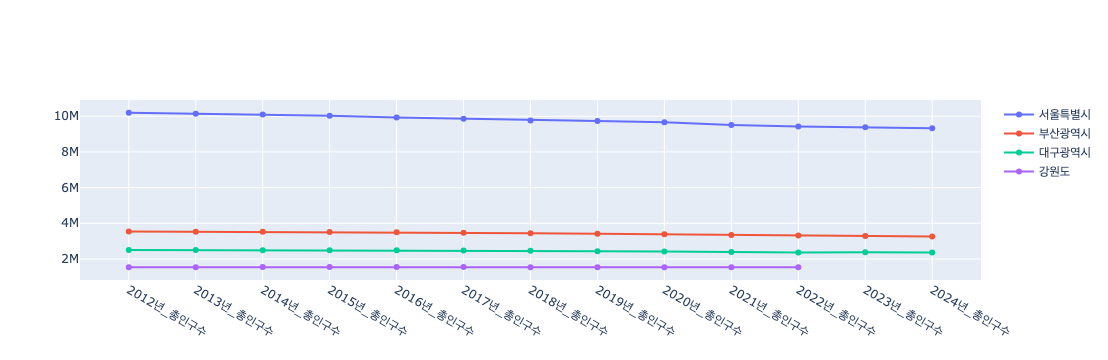

In [23]:
# add_trace한 차트들이 하나의 차트 공간에 겹쳐 그려집니다.
# add_trace 함수들은 하나씩 주석 처리하고, 다시 실행해보세요.

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df["연도별 총인구수"],
    y=df["서울특별시"],
    name="서울특별시"
))

fig.add_trace(go.Scatter(
    x=df["연도별 총인구수"],
    y=df["부산광역시"],
    name="부산광역시"
))

fig.add_trace(go.Scatter(
    x=df["연도별 총인구수"],
    y=df["대구광역시"],
    name="대구광역시"
))

fig.add_trace(go.Scatter(
    x=df["연도별 총인구수"],
    y=df["강원도"],
    name="강원도"
))

컬럼명만 바뀌며, 같은 코드가 반복되니, 이를 파이썬 코드를 통해 간결하게 구현해봅시다.

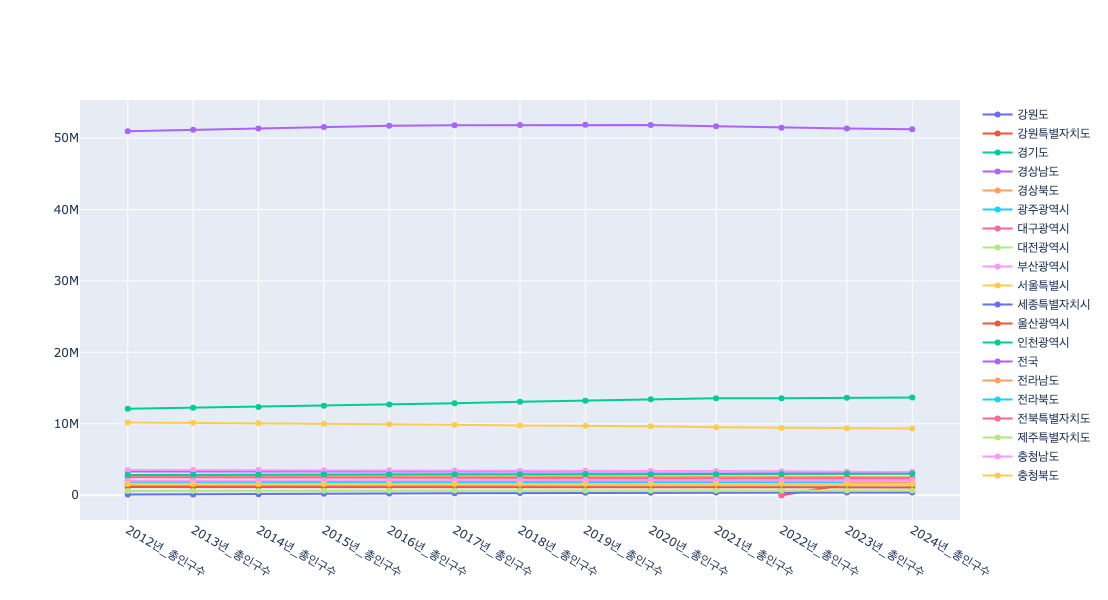

In [27]:
fig = go.Figure()

for column_name in df.columns[1:]:
    fig.add_trace(go.Scatter(
        x=df["연도별 총인구수"],
        y=df[column_name],
        name=column_name
    ))

fig.update_layout(height=600)
fig.show()

서울과 경기도의 인구가 가장 많은 것으로 확인됩니다.

## 지역별 총인구 데이터 분석 및 시각화

In [30]:
import plotly.express as px

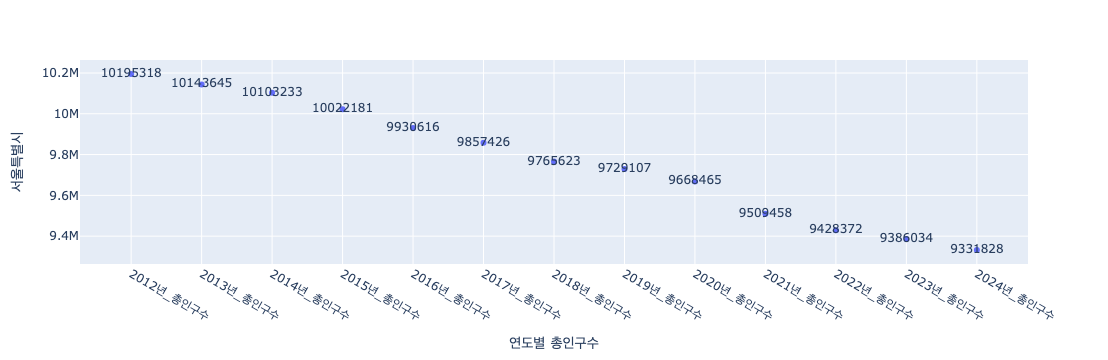

In [33]:
fig = px.scatter(
    df,
    x="연도별 총인구수",
    y="서울특별시",
    text="서울특별시",
)
fig.show()

그래프랑 숫자(데이터)가 겹쳐져있습니다.

차트 제목을 추가하고, 각 포인트의 숫자 렌더링 위치도 변경해봅시다.

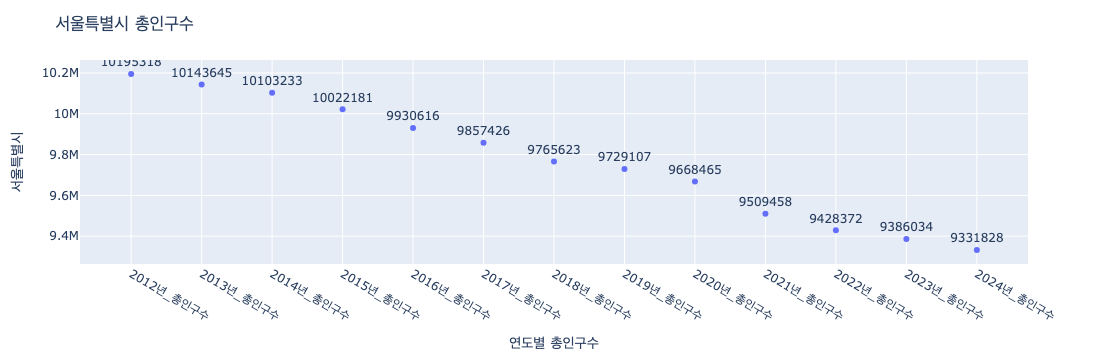

In [35]:
fig = px.scatter(
    df,
    x="연도별 총인구수",
    y="서울특별시",
    text="서울특별시",
)
fig.update_layout(title="서울특별시 총인구수")  # 차트 제목 변경
fig.update_traces(textposition="top center")  # 숫자 위치 지정
fig.show()

차트를 Line 차트로 변경해봅시다.

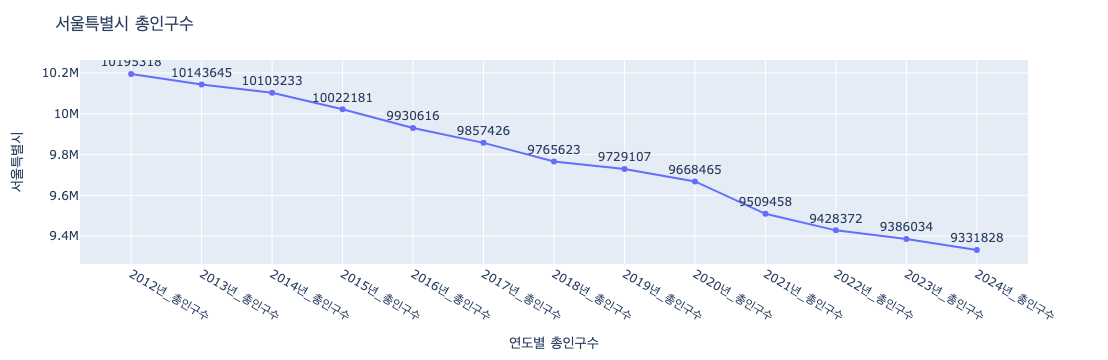

In [41]:
fig = px.line(  # 차트 타입 변경
    df,
    x="연도별 총인구수",
    y="서울특별시",
    text="서울특별시",
)
fig.update_layout(title="서울특별시 총인구수")
fig.update_traces(textposition="top center")
fig.show()

bar 차트로 확인해봅시다.

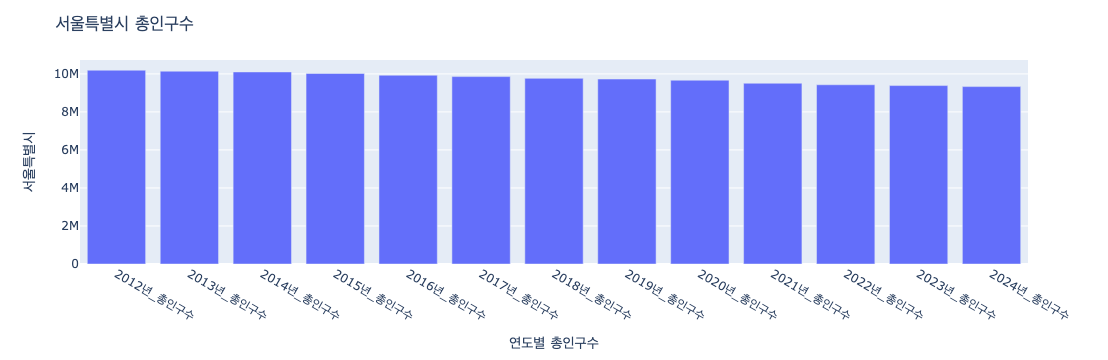

In [45]:
fig = px.bar(  # 차트 타입 변경
    df,
    x="연도별 총인구수",
    y="서울특별시",
)
fig.update_layout(title="서울특별시 총인구수")
fig.show()